## Observations and Insights 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice.
mice_count = len(combined_data["Mouse ID"].unique())
mice_count

249

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dup_mice_df = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
all_dup_mice_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]

In [16]:
# Checking the number of mice in the clean DataFrame.
number_mice=clean_df["Mouse ID"].value_counts()
number_mice=number_of_mice=len(number_mice)
number_mice

248

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_df=combined_data.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean=regimen_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"] 
median=regimen_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"] 
variance=regimen_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"] 
stdv=regimen_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"] 
sem=regimen_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"] 

# Assemble the resulting series into a single summary dataframe.
regimen_analysis_df=pd.DataFrame({"mean":mean,"median":median,"variance":variance, "Standard Deviation": stdv, "SEM": sem}) 
regimen_analysis_df

,mean,median,variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

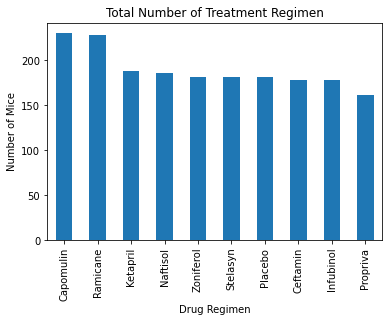

In [19]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_measurements = combined_data['Drug Regimen'].value_counts().plot.bar()

# DataFrame.Plot
total_measurements.set_xlabel("Drug Regimen")
total_measurements.set_ylabel("Number of Mice")
total_measurements.set_title("Total Number of Treatment Regimen")

plt.show()


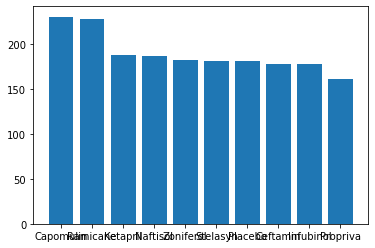

In [20]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

total_measurements = combined_data['Drug Regimen'].value_counts()

plt.bar(total_measurements.index.values,total_measurements.values)

plt.show()

Text(0, 0.5, '')

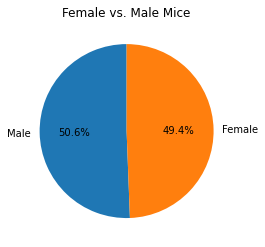

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_data = combined_data['Sex'].value_counts()

gender_pie_plot = gender_data.plot.pie(autopct="%1.1f%%", startangle=90, title= 'Female vs. Male Mice')

gender_pie_plot.set_ylabel('')

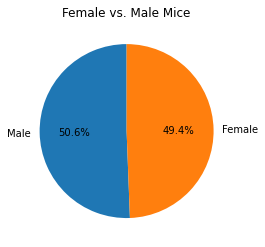

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_data = combined_data['Sex'].value_counts()

plt.pie(gender_data, labels=gender_data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Female vs. Male Mice')

plt.show()


## Quartiles, Outliers and Boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

#Start by getting the last (greatest timepoint) for each mouse
greatest_timepoint = pd.DataFrame(combined_data.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'greatest_timepoint'})
greatest_timepoint

#merge max_timepoint_df to our combined_df
merged_data = pd.merge(combined_data, greatest_timepoint, on='Mouse ID')
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,greatest_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [91]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_list:
    tumor_vol_by_drug = combined_data['Tumor Volume (mm3)'].loc[combined_data['Drug Regimen'] == drug]
# Add subset 
    tumor_volumes.append(tumor_vol_by_drug)
    
# Determine outliers using upper and lower bounds
    quartiles = tumor_vol_by_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'For {drug}, Interquartile Range (IQR) is {iqr}')
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'For {drug}, values below {lower_bound} could be outliers')
    print(f'For {drug}, values above {upper_bound} could be outliers\n')

    

For Capomulin, Interquartile Range (IQR) is 7.314067135000002
For Capomulin, values below 26.714832162499995 could be outliers
For Capomulin, values above 55.9711007025 could be outliers

For Ramicane, Interquartile Range (IQR) is 8.325365415000007
For Ramicane, values below 24.18658646249998 could be outliers
For Ramicane, values above 57.48804812250001 could be outliers

For Infubinol, Interquartile Range (IQR) is 10.002090667500006
For Infubinol, values below 32.309217298749985 could be outliers
For Infubinol, values above 72.31757996875001 could be outliers

For Ceftamin, Interquartile Range (IQR) is 9.5930104575
For Ceftamin, values below 32.818911426250004 could be outliers
For Ceftamin, values above 71.19095325625 could be outliers



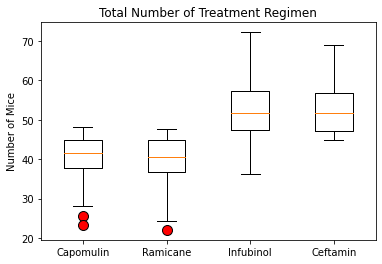

In [96]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
outliers = dict(marker='o', markerfacecolor='r', markersize=10, markeredgecolor='black')

ax1.boxplot(tumor_volumes, flierprops=outliers)

# Add title and labels
ax1.set_title('Total Number of Treatment Regimen')
ax1.set_ylabel('Number of Mice')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

# Show plot
plt.show()

## Line and Scatter Plots

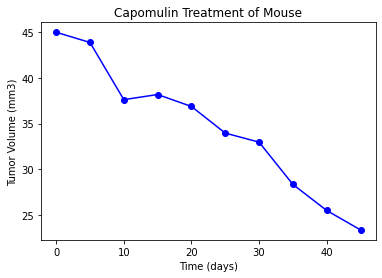

In [181]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#find a mouse    
combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin'].head(10)

mouse = combined_data.loc[combined_data['Mouse ID'] == 's185']


#Plot line chart
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker='o', color = 'b')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse")

# Display plot
plt.show()

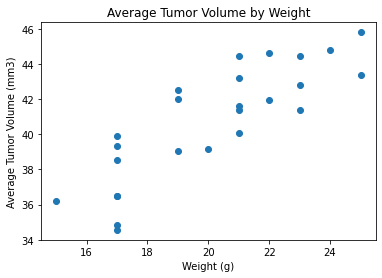

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_df = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']
capomulin_df

#Find Average Tumor volume for each mouse
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df

avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x_data = final_avg_vol_df['Weight (g)']
y_data = final_avg_vol_df['avg_tumor_vol']

plt.scatter(x_data, y_data)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()

## Correlation and Regression

In [31]:
final_avg_vol_df.head()

,Weight (g),avg_tumor_vol
0,17,34.559143
10,15,36.182040
20,17,34.847470
30,17,36.505973
35,17,39.887495


The correlation between both factors is 0.84


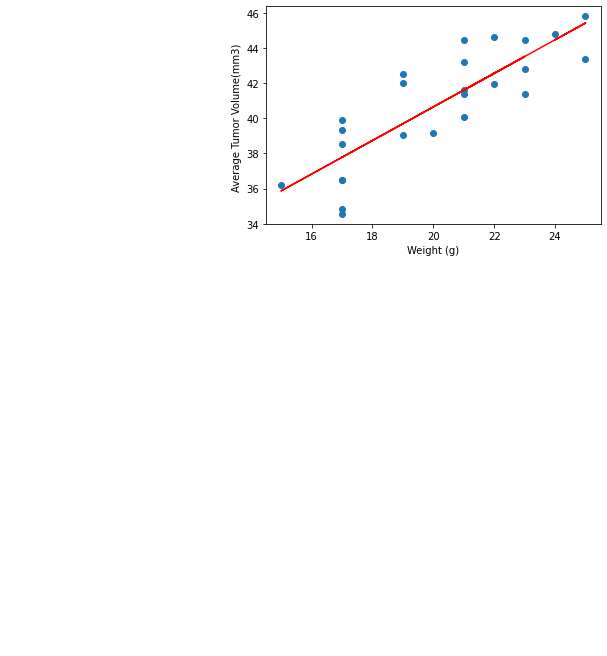

In [33]:
# Calculate the correlation coefficient and linear regression model 

mouse_weight=final_avg_vol_df.iloc[:,0]
avg_vol_df=final_avg_vol_df.iloc[:,1]
correlation= st.pearsonr(mouse_weight,avg_vol_df)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# for mouse weight and average tumor volume for the Capomulin regimen

x_values = final_avg_vol_df['Weight (g)']
y_values = final_avg_vol_df['avg_tumor_vol']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume(mm3) ')

plt.show()


In [ ]:
Obvervation:The correlation of the mouse weight and average tumor volume is 0.84. When the mouse weight increase, the average tumor volume also increase which is a positive correlation.The pie plot shows the total percentage of mice by gender is 49.4% female and 50.6% male. Capomulin and Ramicane were the most success drug in
treating the size of the tumors in the mouse/mice.    